<h1><center>Metody numeryczne i optymalizacja</center></h1>

<h3><center>Lista 4</center></h3>
<h3><center>LINIOWE ZADANIA PODOKREŚLONE</center></h3>



<h6><center>Antoni Bezdzietny 249327</center></h6>

<h6><center>Paweł Krysa 249171</center></h6>

<h6><center>--.04.2022</center></h6>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Problem rozwiązania rzadkiego 
---
Minimalizacja w zadaniach podokreślonych:
$$ min_x \{ ||\boldsymbol{Ax-b}||^2_2 + \gamma E^{(p)}(\boldsymbol{x})  \} $$

Miara różnorodności Lp:
$$ E^{(p)}(\boldsymbol{x}) = sgn(p) \sum^N_{j=1} |x_j|^p \quad p \leq 1$$

In [98]:
def LPDiversity(x, p):
    return np.sign(p)*np.sum(np.power(np.abs(x), p))

def FOCUSS(A,b,p=0.5, k=20, lmb = 1):
    x = np.random.rand(A.shape[1]).reshape(A.shape[1],1)
    for _ in range(k):
        W = np.power(np.diag(np.power(np.abs(x[:,0]), (1-p)/2)), 2)
        x = W@A.T@np.linalg.inv(A@W@A.T+lmb*np.eye(A.shape[0]))@b
    return x  

---
### Zadanie 1
Znajdź liczby a, b, c, dla których poniższy układ równań nie jest sprzeczny. Przyspełnieniu warunku niesprzeczności, znajdź zbiór wszystkich rozwiązań (w funkcji parametrów a, b oraz c):

$$ 
\left\{\begin{matrix}
 x & +3y & +z & = a\\ 
-x & +2y & +z & =b\\ 
 3x & +7y & -z & =c
\end{matrix}\right.
$$

Następnie, wyznacz parametry a, b, c, dla których:
$$(a) x = 0, y = 3, z = 1$$
$$(b) x = 0, y = 0, z = 1$$
$$(c) x = -2, y= 1, z = 0$$
Dla wyznaczonych parametrów a, b, c, znajdź estymowane rozwiązanie przy pomocy zregularyzowanego algorytmu FOCUSS.

In [24]:
A = np.array([[1,3,1],
              [-1,2,1],
              [3,7,-1]])
b = [1,1,1]
FOCUSS(A,b, 0.1)

0.45


---
### Zadanie 2
Wykonaj projekcję dokładnego rozwiązania $\boldsymbol{x}=[1, 0, 1, 1, 0, T]^T$ na podprzestrzeń kolumnową macierzy:

$$
\boldsymbol{A}=
\begin{bmatrix}
1 &  2&  2&  3& 1\\ 
2 &  4&  4&  6& 2\\ 
3 &  6&  6&  9& 6\\ 
1 &  2&  4&  5& 3
\end{bmatrix}
$$

Znajdź rozwiązanie przybliżone dla układu równań $\boldsymbol{AX =b}$ dla danej macierzy $\boldsymbol{A}$ i wektora $\boldsymbol{b}$. Zmień wartość elementu $a_{21}$ z 2 na 0, a następnie powtórz krok estymacji. Wyjaśnij różnicę. Wyznacz błędy rozwiązania i residualny. Który algorytm pozwala uzyskać najlepsze rozwiązanie i dlaczego? Dla jakiej metryki funkcji celu uzyskuje się najlepsze rozwiązanie?

--- 
### Zadanie 3 
Wygeneruj 5 rzadkich sygnałów z dyskretnym czasem, tak aby dla każdego chwili co najwyżej 3 sygnały były niezerowe. Liczba próbek powinna być dobrana rozsądnie, ale nie mniej niż 10. Wykonaj projekcję takich sygnałów na podprzestrzeń kolumnową macierzy $\boldsymbol{A}$, uzyskując sygnały zmieszane.

$$
\boldsymbol{A}=
\begin{bmatrix}
1 &  2&  2&  3& 1\\ 
0 &  4&  4&  6& 2\\ 
3 &  6&  6&  9& 6\\ 
1 &  2&  4&  5& 3
\end{bmatrix}
$$
Następnie dokonaj estymacji sygnałów oryginalnych na podstawie sygnałów zmieszanych wy-
korzystując algorytmy: zregularyzowany FOCUSS i zregularyzowany M-FOCUSS. Który al-
gorytm pozwala uzyskać lepsze wyniki estymacji i dlaczego? Jak dobrać optymalną wartość
parametru regularyzacji?

---
### Zadanie 4
Rozwiąż zadanie podokreślone:
$$min_x ||\boldsymbol{x}||_p \; p.o. \; \boldsymbol{Ax=b},$$

$$
\boldsymbol{A} = 
\begin{bmatrix}
2 &3  &-1  &10  &21  &44  &-9  &1  &-1 \\ 
1 &2  &2  &8  &15  &35  &8  &-3  &1 \\ 
3 &1  &1  &6  &16  &53  &-7  &2  &2 
\end{bmatrix} 
$$

$$
\boldsymbol{b} =
\begin{bmatrix}
118 &77  &129 
\end{bmatrix}^T
$$
$$
p \in [0,1]
$$
Porównaj wyniki dla p = 0 oraz p = 1 pod względem błędu residualnego.

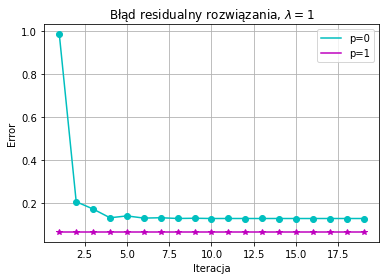

[0.9863049366916713,
 0.20789709018352046,
 0.17398391620430928,
 0.13326271729558772,
 0.1419926913989416,
 0.13183075613330789,
 0.13346026218814436,
 0.13006743537338586,
 0.1310420858826611,
 0.12993663711575187,
 0.1299975538063891,
 0.12993144403754775,
 0.12994699581854552,
 0.12992062529442377,
 0.12992487445099318,
 0.12991719864873635,
 0.12991707008601838,
 0.12991730583143654,
 0.12991725257544684]

In [135]:
A = np.array([[2,3,-1,10,21,44,-9,1,-1],
              [1,2,2,8,15,35,8,-3,1],
              [3,1,1,6,16,53,-7,2,2]])
b = np.array([[118],
             [77],
             [129]])

iterations = range(1,20) #
x_ls_p0 = [FOCUSS(A,b,p=0, k=i, lmb=) for i in iterations] # Dla p=0
x_ls_p1 = [FOCUSS(A,b,p=1, k=i) for i in iterations] # Dla p=1

err_res_p0 = [np.linalg.norm(b-A@x) for x in x_ls_p0] # Błąd dla p=0
err_res_p1 = [np.linalg.norm(b-A@x) for x in x_ls_p1] # Błąd dla p=1

# Wykres błędu residualnego
plt.plot(iterations, err_res_p0, color='c', label='p=0')
plt.plot(iterations, err_res_p0, 'o', color='c')
plt.plot(iterations, err_res_p1, color='m', label='p=1')
plt.plot(iterations, err_res_p1, '*', color='m')
plt.title("Błąd residualny rozwiązania, "+r'$\lambda =1$')
plt.xlabel("Iteracja")
plt.ylabel("Error")
plt.legend()
plt.grid()
plt.show()